In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def risk_alive(t0, R0,alpha, bias):
    return R0 * (1 - np.exp(-alpha * t0)) + bias

# low risk 
def risk_low(t1, R1, beta, bias):
    return R1 * (np.exp(-beta * t1)) + bias

# medium  risk 
def risk_medium(t2, R2, gamma, bias):
    return R2 * ( np.exp(-gamma * t2)) + bias

# high risk
def risk_high(t3, R3, delta, bias):
    return R3 * (np.exp(-delta * t3)) + bias

def risk_expired(t4, R4, omega, bias):
    return (R4 * np.exp(-omega * t4)) + bias

t0 = np.linspace(0, 14 * 24 * 60, 1000)  
t1 = np.linspace(0, 12 * 24 * 60, 1000)
t2 = np.linspace(0, 10 * 24 * 60, 1000) 
t3 = np.linspace(0, 7 * 24 * 60, 1000)
t4 = np.linspace(0, 3 * 24 * 60, 1000)

risk_alive_values = risk_alive(t0, R0=0.4,alpha=0.0003, bias=0)
risk_low_values = risk_low(t1, R1=(0.2-0.45), beta=0.00045, bias=0.45)
risk_medium_values = risk_medium(t2, R2=(0.3-0.5), gamma=0.0005, bias=0.5)
risk_high_values = risk_high(t3, R3=(0.4-0.55), delta=0.00055, bias=0.55)
risk_expired_values = risk_expired(t4, R4=(1.0-0.6), omega=0.0006, bias=0.6)

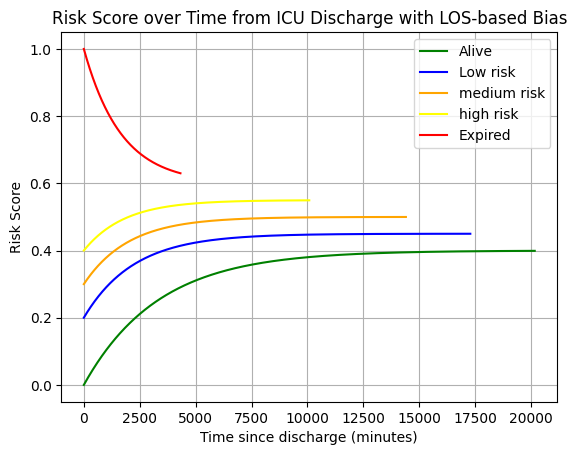

In [40]:
plt.plot(t0, risk_alive_values, label="Alive", color="green")
plt.plot(t1, risk_low_values, label="Low risk", color="blue")
plt.plot(t2, risk_medium_values , label="medium risk", color="orange")
plt.plot(t3, risk_high_values, label="high risk", color="yellow")
plt.plot(t4, risk_expired_values, label="Expired", color="red")


plt.xlabel("Time since discharge (minutes)")
plt.ylabel("Risk Score")
plt.title("Risk Score over Time from ICU Discharge with LOS-based Bias")
plt.legend()
plt.grid(True)
plt.show()


In [17]:
def risk_function(t, category):
    if category == "dead":
        return 0.5 + 0.5 * (1 - np.exp(0.02 * (120 - t)))
    elif category == "home":
        return 0.5 * np.exp(-0.02 * (120 - t))
    elif category == "high risk":
        return 0.5 + 0.3 * (1 - np.exp(-0.02 * (120 - t)))
    elif category == "medium risk":
        return 0.5 + 0.1 * (1 - np.exp(-0.02 * (120 - t)))
    elif category == "low risk":
        return 0.5 - 0.2 * (1 - np.exp(-0.02 * (120 - t)))
    
t = np.linspace(120, 0, 100) 

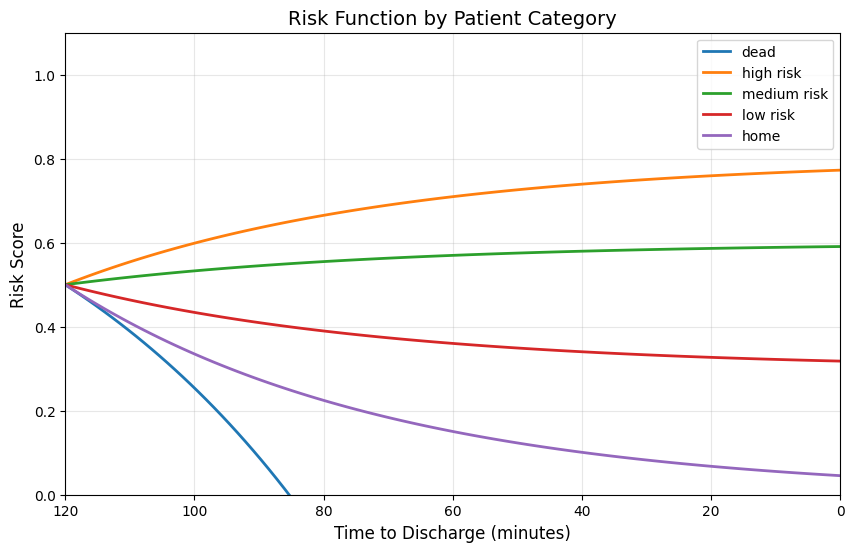

In [ ]:
categories = ["dead", "high risk", "medium risk", "low risk", "home"]
plt.figure(figsize=(10, 6))

for category in categories:
    y = risk_function(t, category)
    plt.plot(t, y, label=category, linewidth=2)

plt.xlabel("Time to Discharge (minutes)", fontsize=12)
plt.ylabel("Risk Score", fontsize=12)
plt.title("Risk Function by Patient Category", fontsize=14)
plt.legend(fontsize=10, loc="upper right")
plt.grid(alpha=0.3)
plt.xlim(120, 0)  
plt.ylim(0, 1.1)  
plt.show()

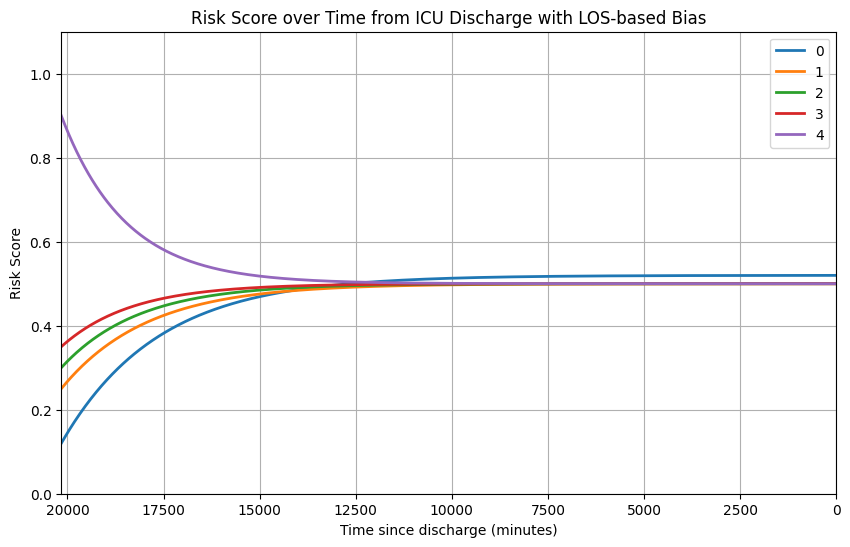

In [ ]:
def risk_function_same(t, category):
    
    V = 0.5
    if category == 0:
        return  0.4 * (1 - np.exp(-0.0003 * (14*24*60-t))) + V-0.38
    elif category == 1:
        return  (0.2-0.45) * (np.exp(-0.00045 * (14*24*60-t))) + V
    elif category == 2:
        return  (0.3-0.5) * ( np.exp(-0.0005 *(14*24*60-t))) + V
    elif category == 3:
        return  (0.4-0.55) * ( np.exp(-0.00055 * (14*24*60-t))) + V
    elif category == 4:
        return  ((1.0-0.6)) * ( np.exp(-0.0006 * (14*24*60-t))) + V
    

t = np.linspace(0, 14* 24 * 60, 1000)  # 14 days in minutes
categories = [0, 1, 2, 3, 4]
plt.figure(figsize=(10, 6))

for category in categories:
    y = risk_function_same(t, category)
    plt.plot(t, y, label=category, linewidth=2)

plt.xlabel("Time since discharge (minutes)")
plt.ylabel("Risk Score")
plt.title("Risk Score over Time from ICU Discharge with LOS-based Bias")
plt.xlim(14* 24 * 60,0) 
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()


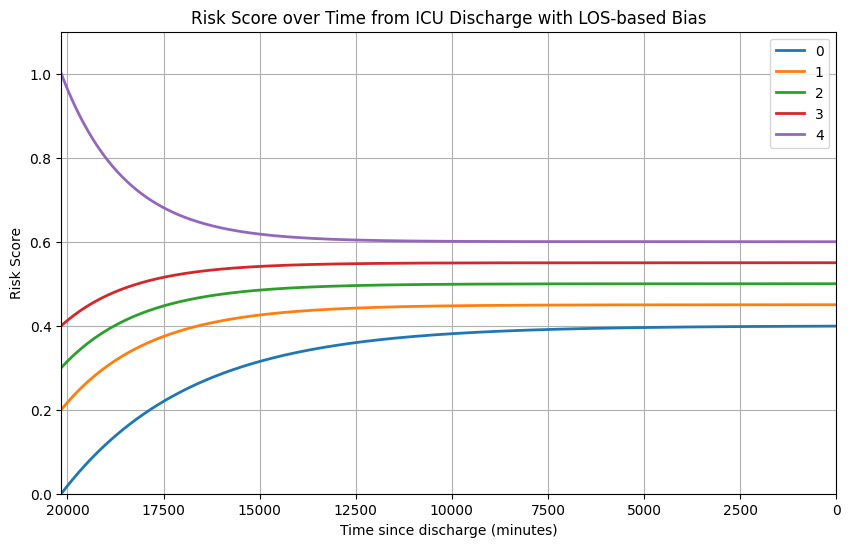

In [ ]:
def risk_function(t, category):
    if category == 0:
        return  0.4 * (1 - np.exp(-0.0003 * (14*24*60-t))) + 0
    elif category == 1:
        return  (0.2-0.45) * (np.exp(-0.00045 * (14*24*60-t))) + 0.45
    elif category == 2:
        return  (0.3-0.5) * ( np.exp(-0.0005 * (14*24*60-t))) + 0.5
    elif category == 3:
        return  (0.4-0.55) * ( np.exp(-0.00055 * (14*24*60-t))) + 0.55
    elif category == 4:
        return  ((1.0-0.6)) * ( np.exp(-0.0006 * (14*24*60-t))) + 0.6
    
    
t = np.linspace(0, 14* 24 * 60, 1000)  
categories = [0, 1, 2, 3, 4]
plt.figure(figsize=(10, 6))

for category in categories:
    y = risk_function(t, category)
    plt.plot(t, y, label=category, linewidth=2)

plt.xlabel("Time since discharge (minutes)")
plt.ylabel("Risk Score")
plt.title("Risk Score over Time from ICU Discharge with LOS-based Bias")
plt.xlim(14* 24 * 60,0)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()